In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#f(x) = exp(-sin(x^2)/2) + x
def f(x):
    return np.exp(-np.sin(x**2)/2) + x


In [3]:
#25 datapoints between -10 and 10
x_all = np.linspace(-10, 10, 25)
y_all = f(x_all)

# split into train 20 and test 5
idx = np.arange(len(x_all))
np.random.shuffle(idx)
train_idx, test_idx = idx[:20], idx[20:]

x_train, y_train = x_all[train_idx], y_all[train_idx]
x_test, y_test = x_all[test_idx], y_all[test_idx]


In [4]:
#tanh
def g(z):
    return np.tanh(z)

def g_der(z):
    return 1 - np.tanh(z)**2


In [5]:
# # Relu
# def g(x):
#     return np.maximum(0, x)

# def g_der(x):
#     return (x > 0).astype(float)


In [6]:
#take random weights and bias
rng = np.random.default_rng(42)
w1, b1 = rng.normal(), rng.normal()
w2, b2 = rng.normal(), rng.normal()
w3, b3 = rng.normal(), rng.normal()


In [7]:
# learning rate
lr = 0.01
epochs = 10000
m = len(x_train)


In [8]:
for epoch in range(epochs):
    dw1 = db1 = dw2 = db2 = dw3 = db3 = 0
    loss = 0

    for xi, yi in zip(x_train, y_train):
        # forward
        z1 = w1*xi + b1
        a1 = g(z1)
        z2 = w2*a1 + b2
        a2 = g(z2)
        z3 = w3*a2 + b3
        y_hat = g(z3)

        # loss
        loss += (y_hat - yi)**2

        # backward
        dL_dyhat = 2*(y_hat - yi)

        dz3 = dL_dyhat * g_der(z3)
        dw3 += dz3 * a2
        db3 += dz3

        dz2 = dz3 * w3 * g_der(z2)
        dw2 += dz2 * a1
        db2 += dz2

        dz1 = dz2 * w2 * g_der(z1)
        dw1 += dz1 * xi
        db1 += dz1

    # average
    dw1 /= m; db1 /= m
    dw2 /= m; db2 /= m
    dw3 /= m; db3 /= m

    # update
    w1 -= lr*dw1; b1 -= lr*db1
    w2 -= lr*dw2; b2 -= lr*db2
    w3 -= lr*dw3; b3 -= lr*db3

    if epoch % 1000 == 0:
        print("epoch:", epoch, " loss:", loss/m)


epoch: 0  loss: 42.307765685231416
epoch: 1000  loss: 28.501216700595943
epoch: 2000  loss: 28.485788884760048
epoch: 3000  loss: 28.48114052870816
epoch: 4000  loss: 28.478888964526373
epoch: 5000  loss: 28.47755961961
epoch: 6000  loss: 28.47668211044583
epoch: 7000  loss: 28.476059527840782
epoch: 8000  loss: 28.475594878199463
epoch: 9000  loss: 28.47523483670967


In [9]:
def predict(x):
    z1 = w1*x + b1
    a1 = g(z1)
    z2 = w2*a1 + b2
    a2 = g(z2)
    z3 = w3*a2 + b3
    return g(z3)


In [10]:
y_pred_train = np.array([predict(xi) for xi in x_train])
y_pred_test = np.array([predict(xi) for xi in x_test])
y_pred_all = np.array([predict(xi) for xi in x_all])


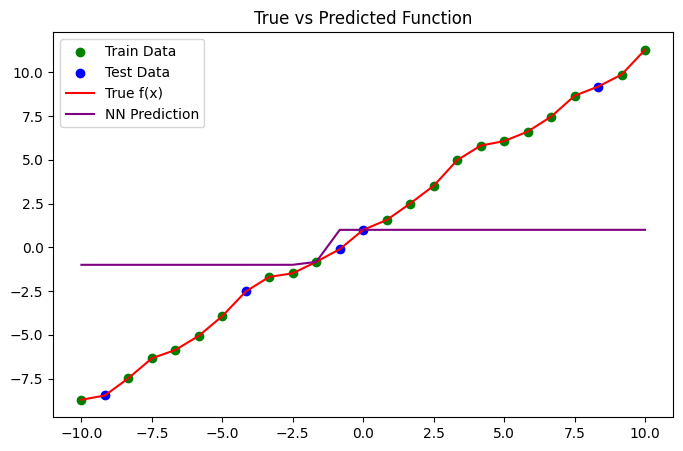

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, label="Train Data", color="green")
plt.scatter(x_test, y_test, label="Test Data", color="blue")
plt.plot(x_all, y_all, label="True f(x)", color="red")
plt.plot(x_all, y_pred_all, label="NN Prediction", color="purple")
plt.legend()
plt.title("True vs Predicted Function")
plt.show()


In [12]:
train_err = np.mean((y_pred_train - y_train)**2)
test_err = np.mean((y_pred_test - y_test)**2)

print("Training MSE:", train_err)
print("Test MSE:", test_err)


Training MSE: 28.47494765618324
Test MSE: 25.255195300743452


In [14]:

#Relu
# Training MSE: 25.65795071346173
# Test MSE: 36.285481093184